In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("health care diabetes.csv")
dataframe=data

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape


(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
d1=data.duplicated(keep='first')
d1

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
d2=data.isnull().sum()
d2

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


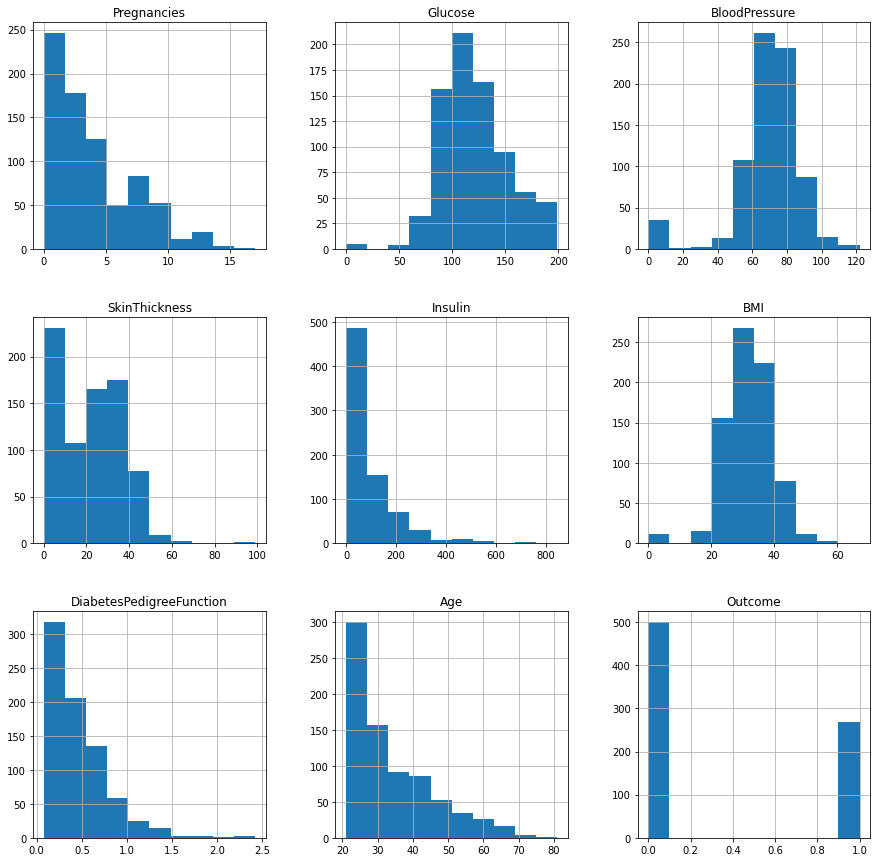

In [9]:
data.hist(figsize=(15,15));

In [10]:
df=dataframe.iloc[:,1:-3]
df=df.mask(df==0).fillna(df.mean())

In [11]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1


In [12]:
df1=dataframe.iloc[:,0]
df2=dataframe.iloc[:,-3:]
#df1=df1.to_frame()
#df2=df2.to_frame()
print(df1.head())
df2.head()

0    6
1    1
2    8
3    1
4    0
Name: Pregnancies, dtype: int64


,DiabetesPedigreeFunction,Age,Outcome
0,0.627,50,1
1,0.351,31,0
2,0.672,32,1
3,0.167,21,0
4,2.288,33,1


In [13]:
new_data=pd.concat([df1, df, df2], axis=1)
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [14]:
x=new_data.dtypes
print(x)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [15]:
import seaborn as sns

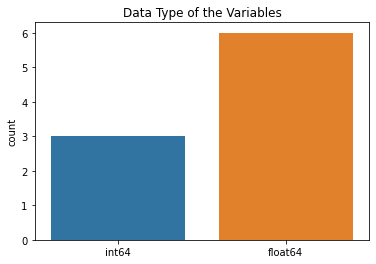

In [16]:
sns.countplot(x=x, data=new_data)
plt.title("Data Type of the Variables")
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

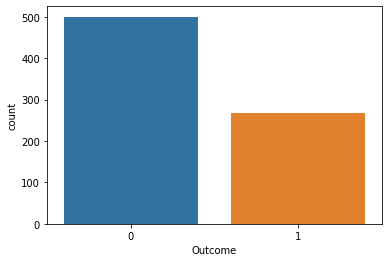

In [17]:
sns.countplot(new_data.Outcome)

Text(0.5, 1.0, 'Glucose Level Versus Outcome')

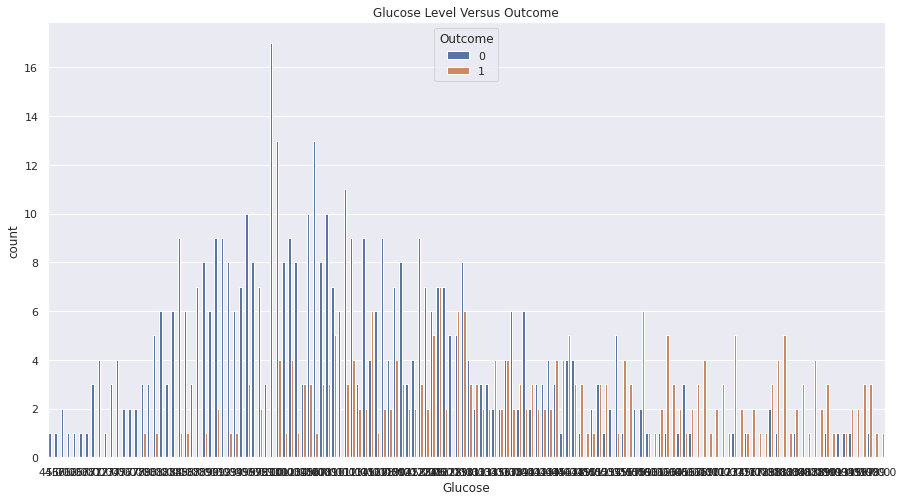

In [18]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(x='Glucose', data=new_data, hue='Outcome')
plt.title('Glucose Level Versus Outcome')


Text(0.5, 1.0, 'Blood Pressure Versus Outcome')

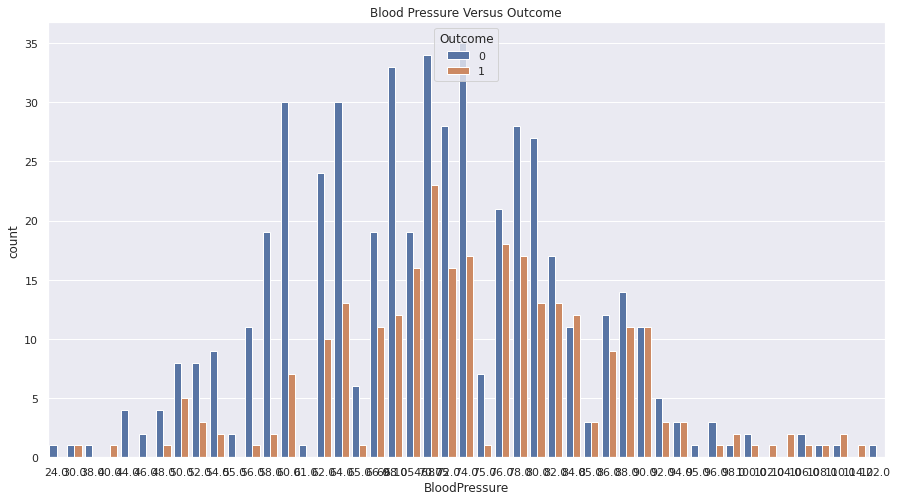

In [19]:
sns.countplot(x='BloodPressure', data=new_data, hue='Outcome')
plt.title('Blood Pressure Versus Outcome')

Text(0.5, 1.0, 'Skin Thickness Versus Outcome')

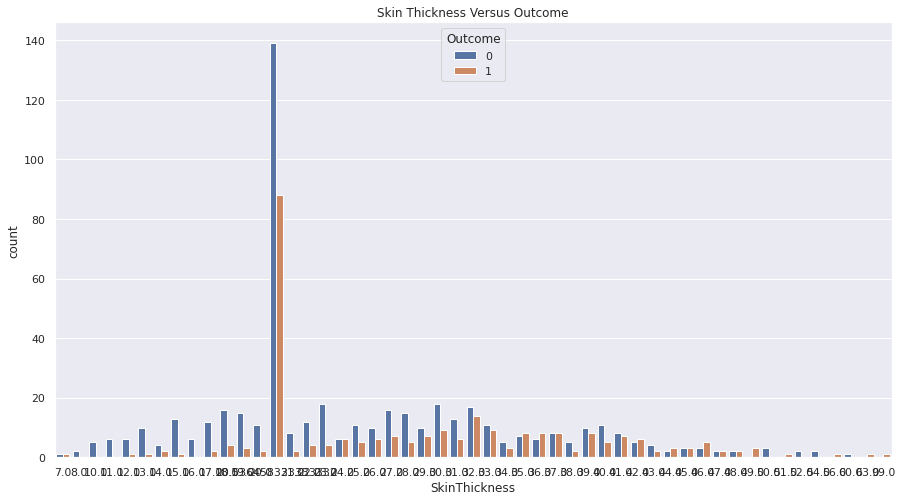

In [20]:
sns.countplot(x='SkinThickness', data=new_data, hue='Outcome')
plt.title('Skin Thickness Versus Outcome')

<AxesSubplot:xlabel='Insulin', ylabel='count'>

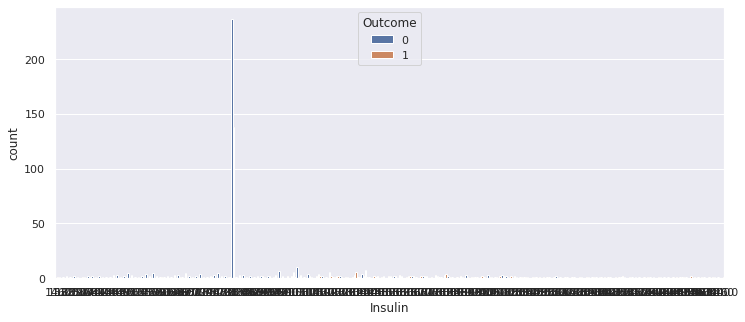

In [21]:
sns.set(rc={'figure.figsize':(12,5)})
sns.countplot(x='Insulin', data=new_data, hue='Outcome')

<AxesSubplot:xlabel='BMI', ylabel='count'>

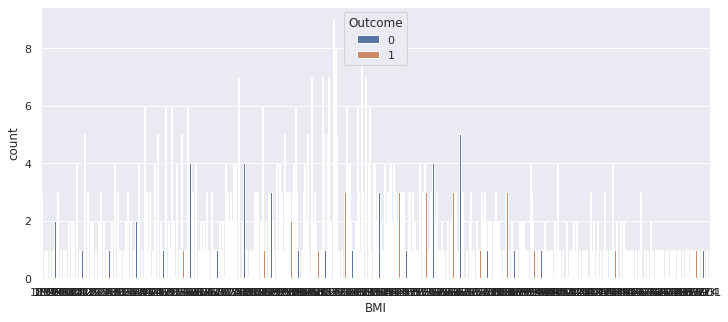

In [22]:
sns.countplot(x='BMI', data=new_data, hue='Outcome')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='count'>

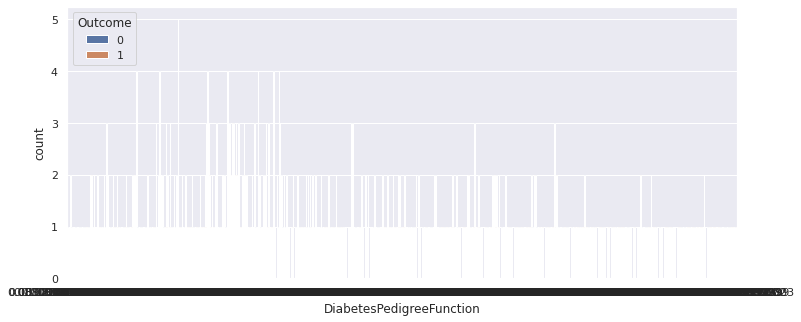

In [23]:
sns.countplot(x='DiabetesPedigreeFunction', data=new_data, hue='Outcome')

In [24]:
def col(col_plot):
    col=("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age")
    for i in new_data[[col]]:
        col_plot=sns.countplot(x='i', data=new_data, hue='Outcome')
        i=i+1
    print(i)
    return(col_plot)    

In [ ]:
sns.pairplot(new_data, hue='Outcome')

In [ ]:
sns.heatmap(new_data.corr())
plt.show()

In [ ]:
correlation=new_data.corr()
correlation[correlation>0.5]

In [ ]:
selected_data=new_data[["Pregnancies","Glucose", "BMI", "SkinThickness","Age"]]
print(selected_data)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
model=scaler.fit(selected_data)
scaled_data=model.transform(selected_data)
print(scaled_data)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=scaled_data
y=new_data['Outcome']

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
accuracy=logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression :  ', accuracy*100)

from sklearn.metrics import f1_score, classification_report, confusion_matrix
y_pred=logreg.predict(X_test)
f1=f1_score(y_pred, y_test)
print('f1_score : ', f1) 
con_mat=confusion_matrix(y_test, y_pred)
print()
print('Confusion Matrix: \n ', con_mat)
print()
print(classification_report(y_pred, y_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_predict=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score  
accu=accuracy_score(y_test, y_predict)
print("Accuracy of Decision Tree Classifier", accu*100)

f1score=f1_score(y_predict, y_test)
print('f1 score :', f1score)
print(confusion_matrix(y_test, y_predict))  
print(classification_report(y_test, y_predict))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=30, random_state=0)
rfc.fit(X_train,y_train)
y_predicted=rfc.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
acc=accuracy_score(y_test, y_predicted)
print("Accuracy of Random Forest Classifier: ", acc*100)
F1score=f1_score(y_predicted, y_test)
print("f1 score: ", F1score)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred1=knn.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
accu=accuracy_score(y_test, y_pred1)
print("Accuracy of KNN algorithm: ", accu)
F1=f1_score(y_pred1, y_test)
print("f1 score: ", F1)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

# Comparing the Models:

In [ ]:
from sklearn import metrics

In [ ]:
y_pred_proba=logreg.predict_proba(X_test)[:,1]
fpr,tpr,_=metrics.roc_curve(y_test, y_pred_proba)
auc=metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=" Logistic Regression AUC = "+str(auc))
plt.xlabel('False Positive Rate')   #specificity, sensitivity
plt.ylabel('True Positive Rate')
plt.title(' AUC (ROC) Curve')

y_predict_proba=classifier.predict_proba(X_test)[:,1]
fpr, tpr, _=metrics.roc_curve(y_test, y_predict_proba)
auc1=metrics.roc_auc_score(y_test, y_predict_proba)

plt.plot(fpr, tpr, label=" Decision Tree AUC = "+str(auc1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC (ROC) Curve')

y_predicted_proba=rfc.predict_proba(X_test)[:,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_predicted_proba)
auc2=metrics.roc_auc_score(y_test, y_predicted_proba)
plt.plot(fpr, tpr, label=   "Random Forest AUC= "+str(auc2))

y_pred1_proba=knn.predict_proba(X_test)[:,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred1_proba)
auc3= metrics.roc_auc_score(y_test, y_pred1_proba)
plt.plot(fpr, tpr, label = "KNN AUC = "+str(auc3))

plt.legend()
plt.show()

In [ ]:
new_data.to_excel('raw_data.xls', index=False